<a href="https://colab.research.google.com/github/martin-kagya/HubbleMind-ML/blob/main/HubbleMind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**FINDING THE MODE, MEDIAN AND MEAN OF CONTINUOUS DATA**


In [3]:
#continuous data statistics
import pandas as pd
import statistics

# List of continuous features
continuous = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'TUE', 'FAF', 'NCP']

# Initialize lists to store the calculated values
modes = []
medians = []
means = []

# Calculate mode, median, and mean for each continuous feature
for feature in continuous:
    modes.append(statistics.mode(df[feature]))
    medians.append(statistics.median(df[feature]))
    means.append(statistics.mean(df[feature]))

# Create a DataFrame to display the results
stats_df = pd.DataFrame({
    "Feature": continuous,
    "Mode": modes,
    "Median": medians,
    "Mean": means
})

# Display the DataFrame
print(stats_df)

# (Optional) Export to CSV for documentation
stats_df.to_csv("continuous_features_statistics.csv", index=False)


  Feature  Mode     Median       Mean
0     Age  18.0  22.777890  24.312600
1  Height   1.7   1.700499   1.701677
2  Weight  80.0  83.000000  86.586058
3    FCVC   3.0   2.385502   2.419043
4    CH2O   2.0   2.000000   2.008011
5     TUE   0.0   0.625350   0.657866
6     FAF   0.0   1.000000   1.010298
7     NCP   3.0   3.000000   2.685628


**ENCODING DATA**

I used one hot encoding for categorical attributes and label encoding for the binary data

In [4]:

label_enc = LabelEncoder()
oneHot = OneHotEncoder(sparse_output=False)
def preprocess_inputs(df):
    dfcopy = df.copy()

    # Apply Label Encoding to each column that requires it
    for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']:
        dfcopy[col] = label_enc.fit_transform(dfcopy[col])

    # Apply One-Hot Encoding to multiple columns
    oneHot_encoded_data = oneHot.fit_transform(dfcopy[['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']])

    # Convert the OneHotEncoded data into a DataFrame
    oneHot_encoded_df = pd.DataFrame(oneHot_encoded_data, columns=oneHot.get_feature_names_out(['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']))

    # Drop the original columns that were One-Hot Encoded
    dfcopy = dfcopy.drop(['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'], axis=1)

    # Concatenate the label encoded columns with the One-Hot encoded DataFrame
    df_final = pd.concat([dfcopy, oneHot_encoded_df], axis=1)

    return df_final

copied_data = preprocess_inputs(df)

**VISUALIZING DATA OUTLIERS IN BOX PLOT**

I used boxplots to visualize outlier data in both height and weight.
I capped off the outlier values to make sure they fell in a good range

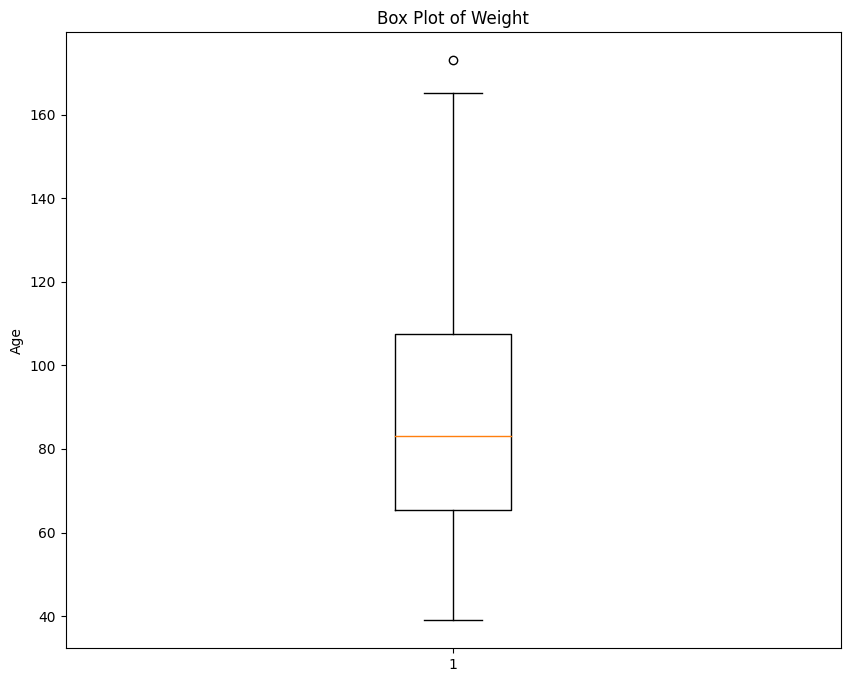

In [5]:
import matplotlib.pyplot as plt
#identifying outliers with boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(copied_data['Weight'])
plt.title('Box Plot of Weight')
plt.ylabel('Age')
plt.show()

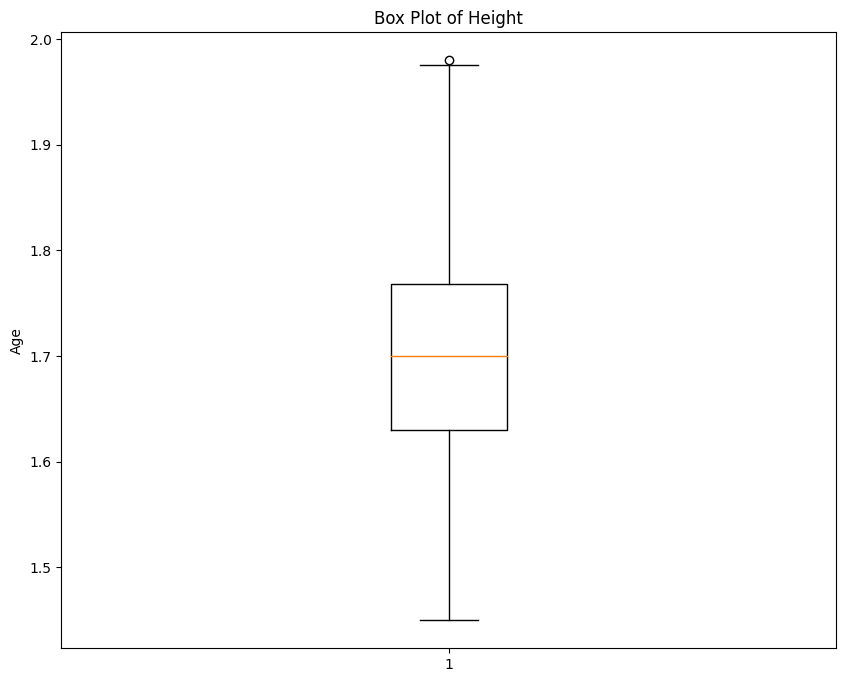

In [6]:
plt.figure(figsize=(10, 8))
plt.boxplot(copied_data['Height'])
plt.title('Box Plot of Height')
plt.ylabel('Age')
plt.show()

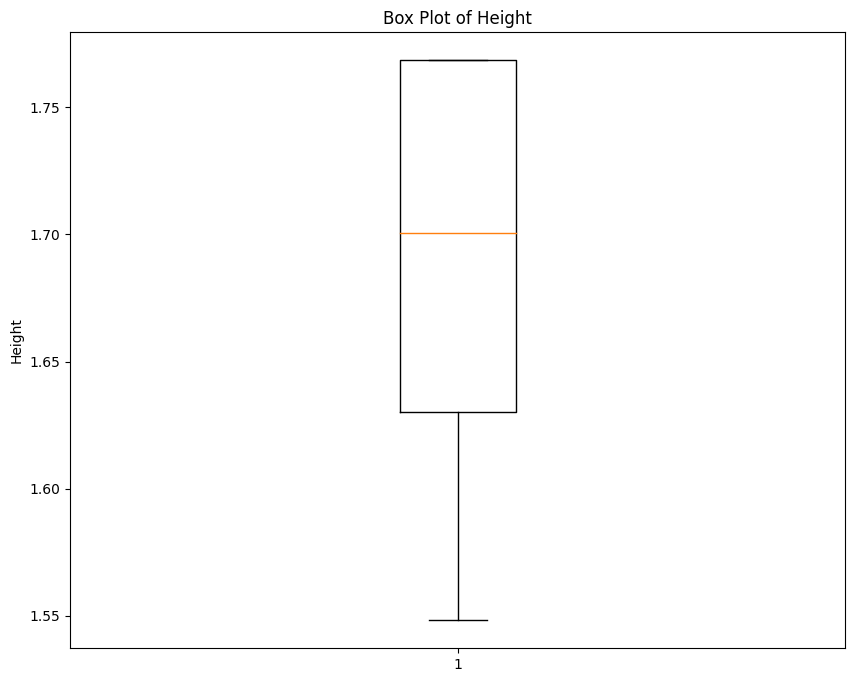

In [7]:
#applying capping to outliers
import numpy as np
import matplotlib.pyplot as plt

def capped_outliers(df, low_cap=5, high_cap=75):
    columns_capped = ['Height', 'Weight']  # Fixed typo
    for col in columns_capped:
        low_limit = np.percentile(df[col], low_cap)
        high_limit = np.percentile(df[col], high_cap)
        # Update the column with the clipped values
        df[col] = np.clip(df[col], low_limit, high_limit)
    return df

# Apply the capping
copied_data = capped_outliers(copied_data)

# Checking if outliers exist in 'Height'
plt.figure(figsize=(10, 8))
plt.boxplot(copied_data['Height'])
plt.title('Box Plot of Height')
plt.ylabel('Height')
plt.show()


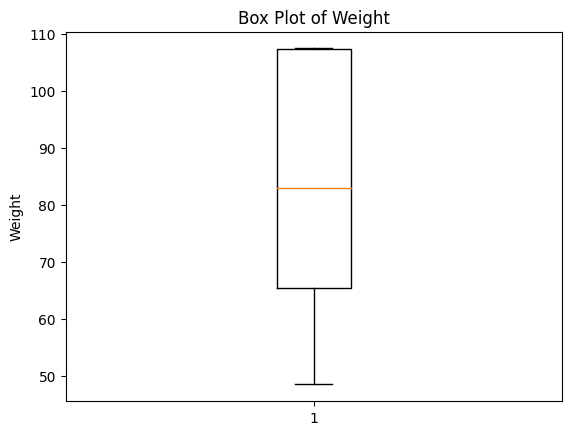

In [8]:
plt.boxplot([copied_data['Weight']])
plt.title('Box Plot of Weight')
plt.ylabel('Weight')
plt.show()

Text(0.5, 0, 'FAF')

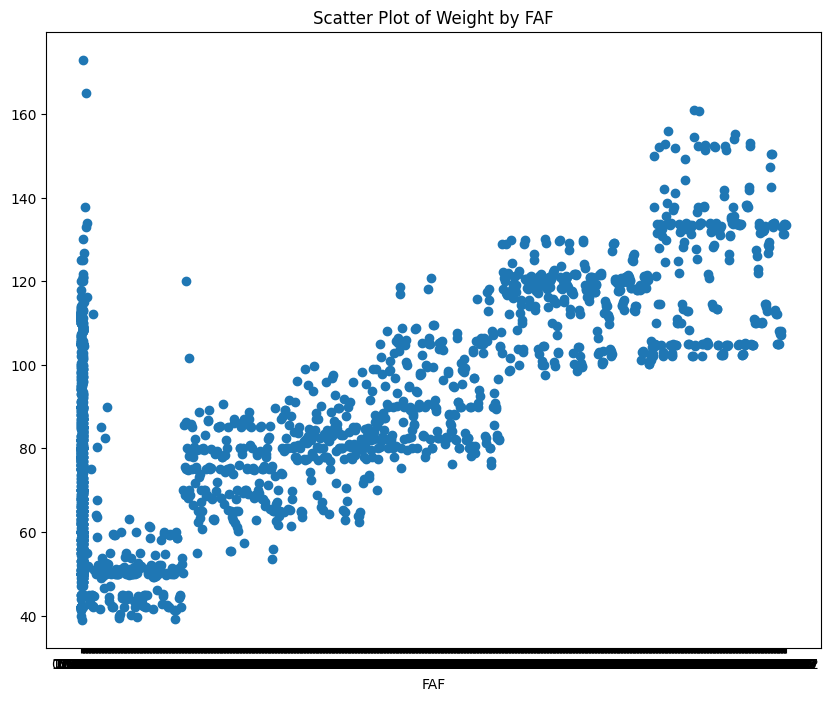

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Convert 'FAF' to categorical if it's not already (e.g., if it's integer levels)
df['FAF'] = df['FAF'].astype(str)  # Convert to string to treat 'FAF' as categories

# Create a box plot
plt.figure(figsize=(10, 8))
plt.scatter(df['FAF'], df['Weight'])
plt.title('Scatter Plot of Weight by FAF')
plt.xlabel('FAF')

In [10]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scale(df=copied_data):
  columns_to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF','NCP']
  for cols in columns_to_scale:
    df[cols] = scaler.fit_transform(df[[cols]])
  return df

copied_data = scale(copied_data)
copied_data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,0.148936,0.325695,0.263021,1,0,0.5,0.666667,0,0.5,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0.148936,0.000000,0.127268,1,0,1.0,0.666667,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.191489,1.000000,0.483619,1,0,0.5,0.666667,0,0.5,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.276596,1.000000,0.653310,0,0,1.0,0.666667,0,0.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.170213,1.000000,0.700823,0,0,0.5,0.000000,0,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#getting the correlation matrix for the dataFrame
cols = [c for c in copied_data.columns if c.startswith('NObeyesdad_')]

for col in cols:
    filter_df = copied_data[[col, 'Weight']]
    print(filter_df.corr())


                                NObeyesdad_Insufficient_Weight    Weight
NObeyesdad_Insufficient_Weight                        1.000000 -0.588854
Weight                                               -0.588854  1.000000
                          NObeyesdad_Normal_Weight    Weight
NObeyesdad_Normal_Weight                  1.000000 -0.404772
Weight                                   -0.404772  1.000000
                           NObeyesdad_Obesity_Type_I    Weight
NObeyesdad_Obesity_Type_I                   1.000000  0.195938
Weight                                      0.195938  1.000000
                            NObeyesdad_Obesity_Type_II    Weight
NObeyesdad_Obesity_Type_II                    1.000000  0.452024
Weight                                        0.452024  1.000000
                             NObeyesdad_Obesity_Type_III    Weight
NObeyesdad_Obesity_Type_III                     1.000000  0.483808
Weight                                          0.483808  1.000000
             

**PLOTTING HISTOGRAMS**

Plotting KDE histograms to visualize the data distributions in continuous data

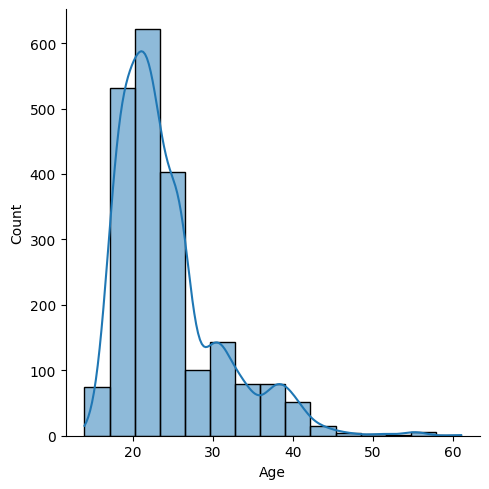

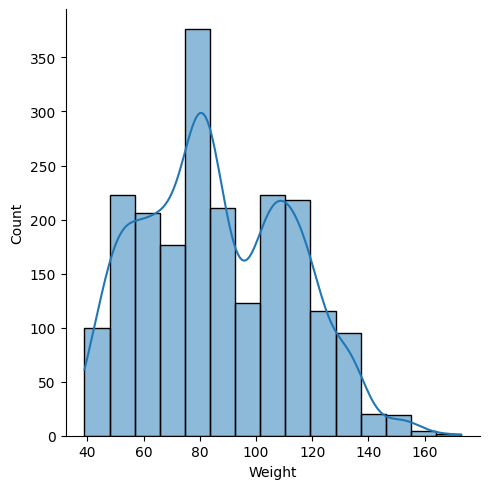

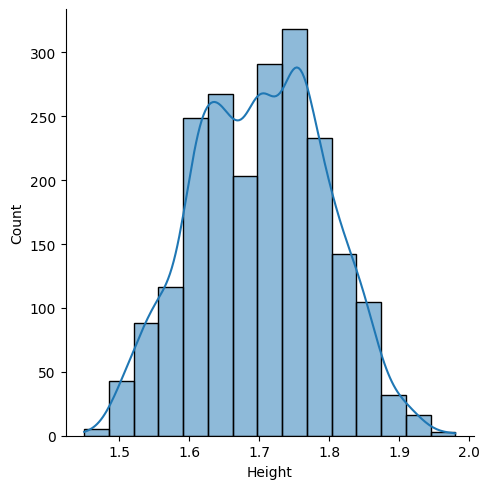

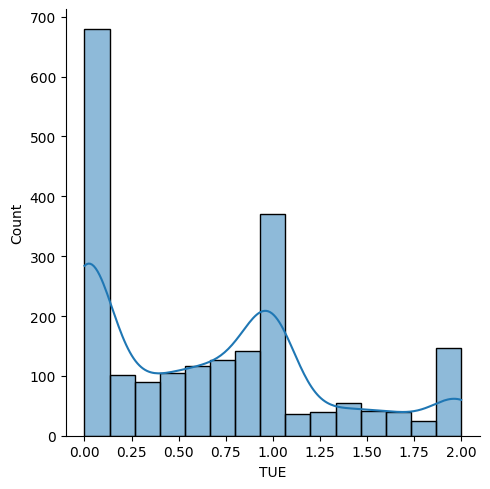

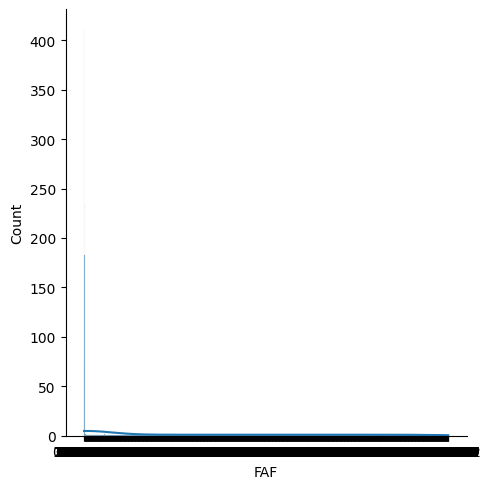

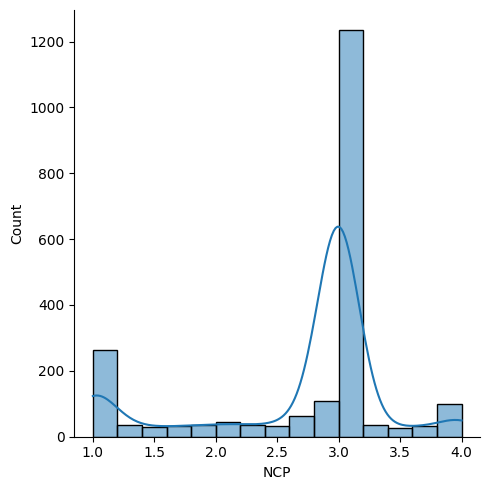

In [12]:
for i in ['Age', 'Weight', 'Height', 'TUE', 'FAF', 'NCP']:
  sns.displot(df[i], kde=True, bins=15)
  plt.show()


**SCATTER PLOT**

Scatter plots were used to visualize the relationship between age, weight and obesity level

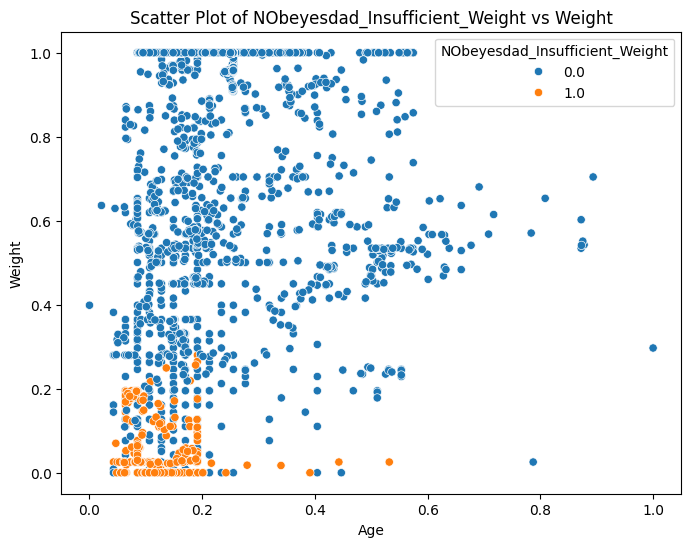

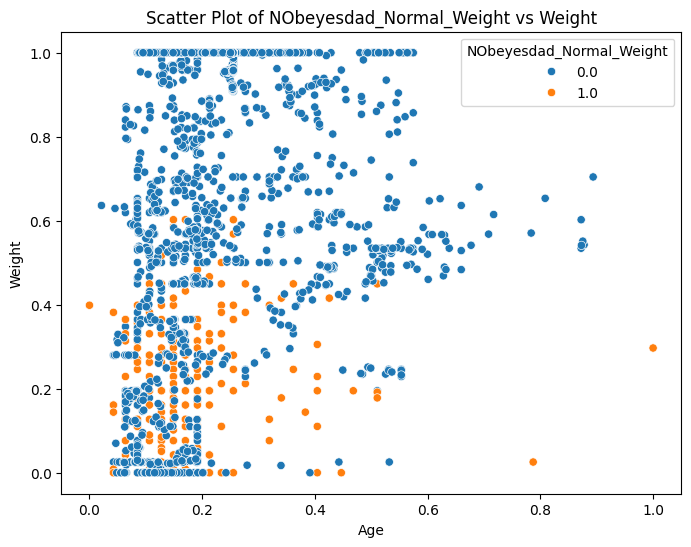

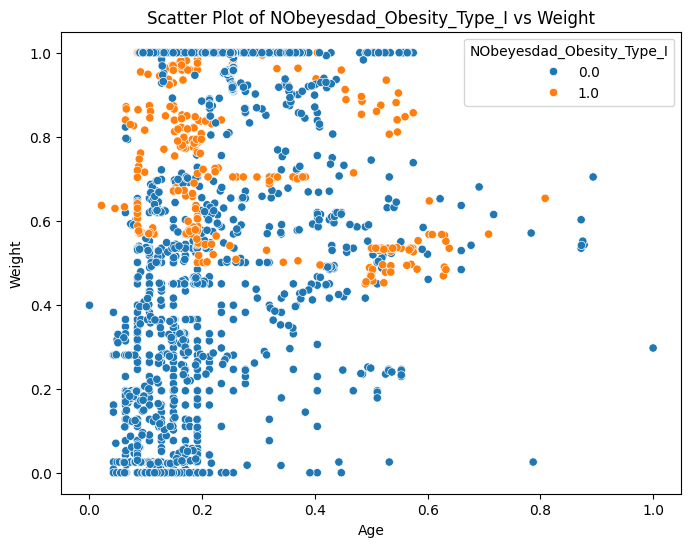

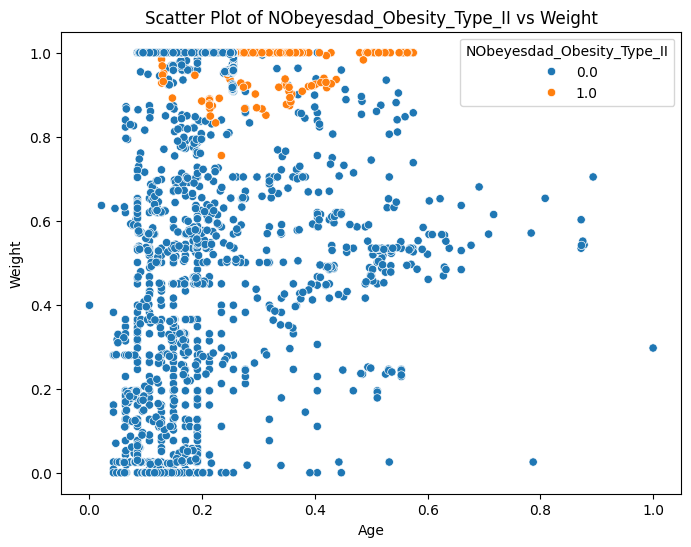

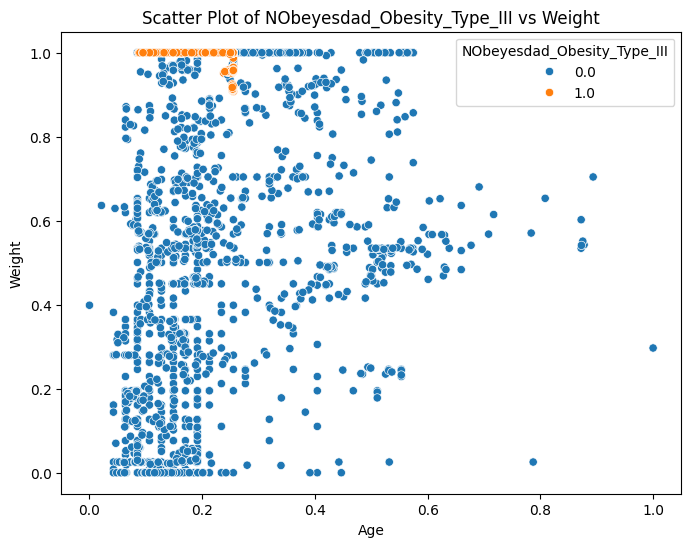

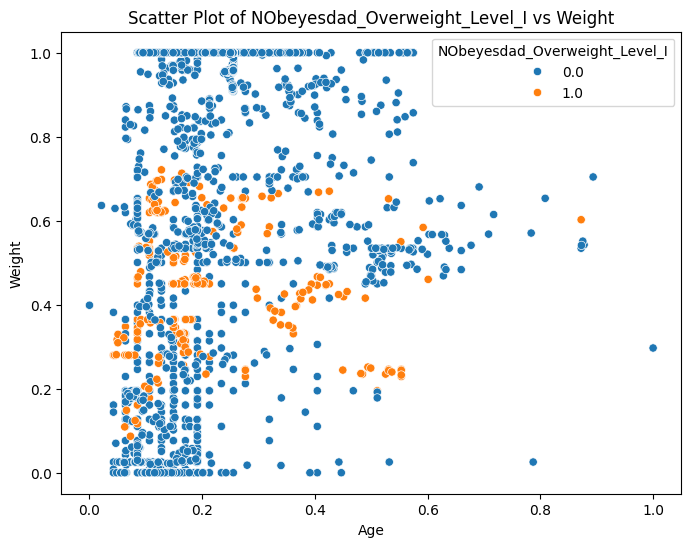

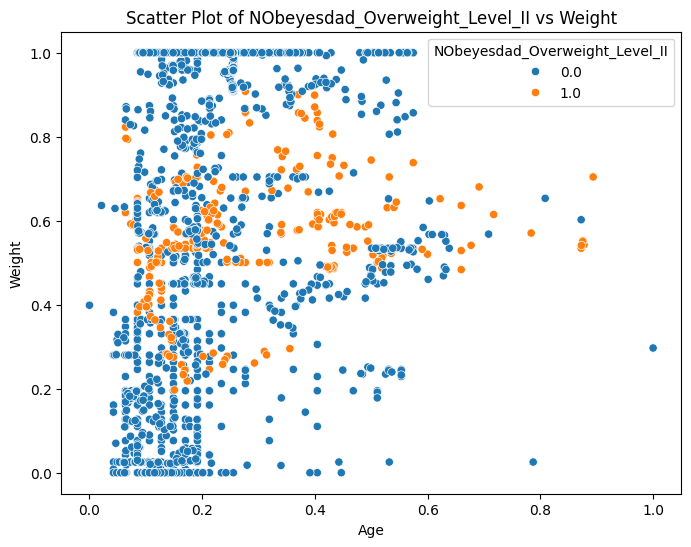

In [13]:
one_hot_columns = [
    'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
    'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
    'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
    'NObeyesdad_Overweight_Level_II'
]

# Plot histograms for each one-hot encoded feature
for col in one_hot_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Age", y='Weight', hue=f'{col}', data=copied_data)
    plt.xlabel('Age')
    plt.ylabel('Weight')
    plt.title(f'Scatter Plot of {col} vs Weight')
    plt.show()

**HEATMAP**

Heatmaps are used to visualize the data and their correlations with each other.
This showed how greatly various attributes correlated with others

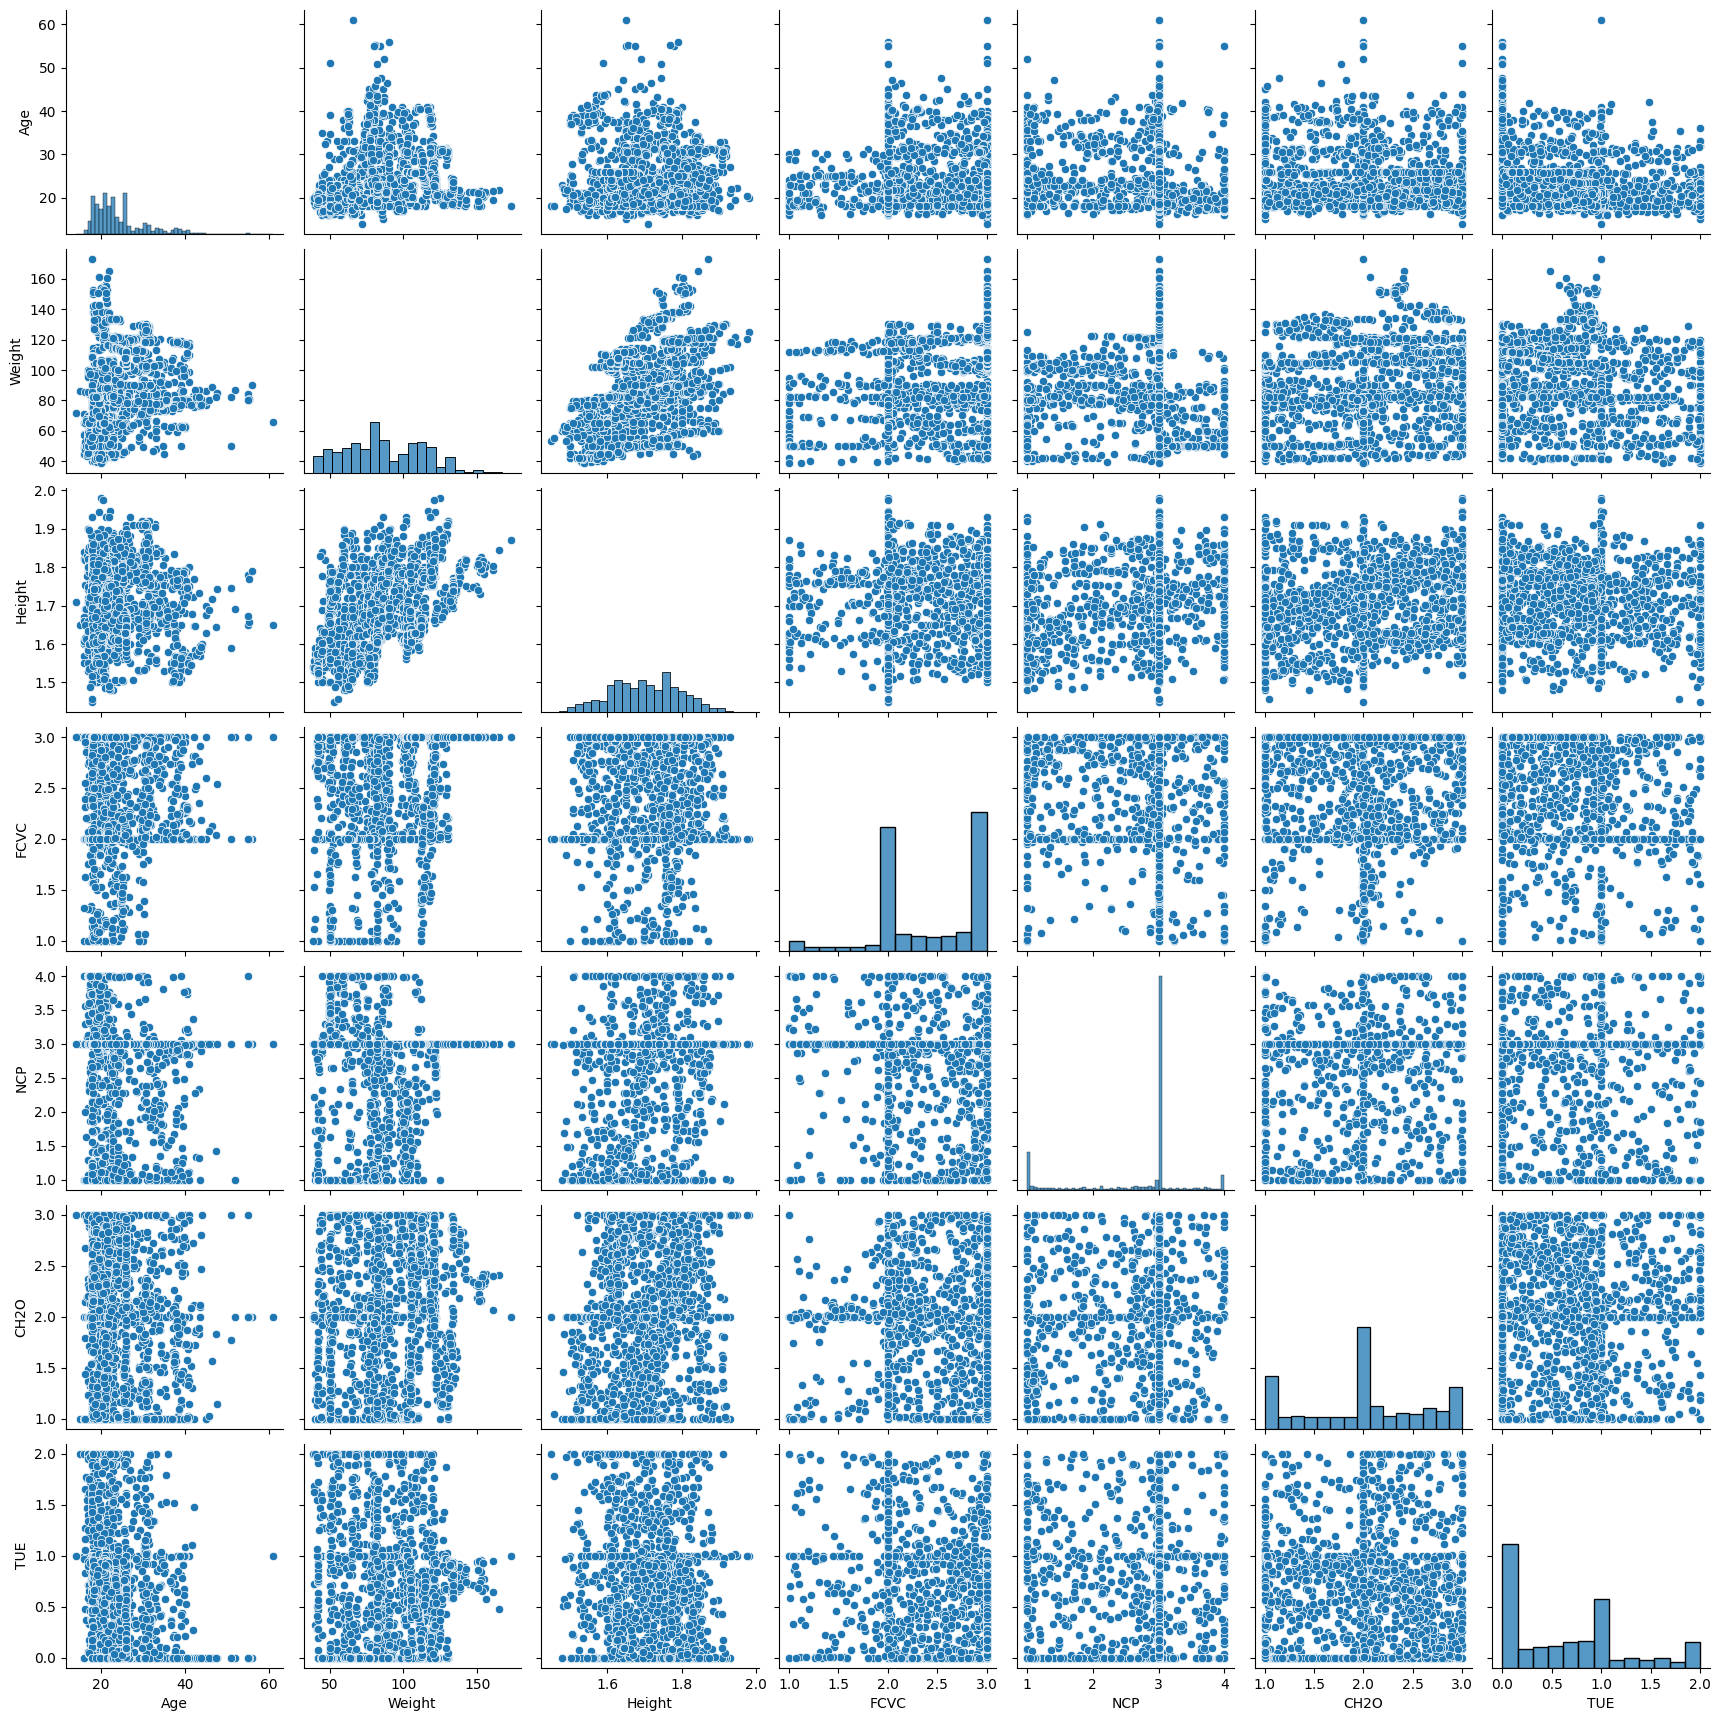

In [14]:
#pairplots
continuous_data = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
continuous_df = df[continuous_data]
sns.pairplot(continuous_df)
plt.show()

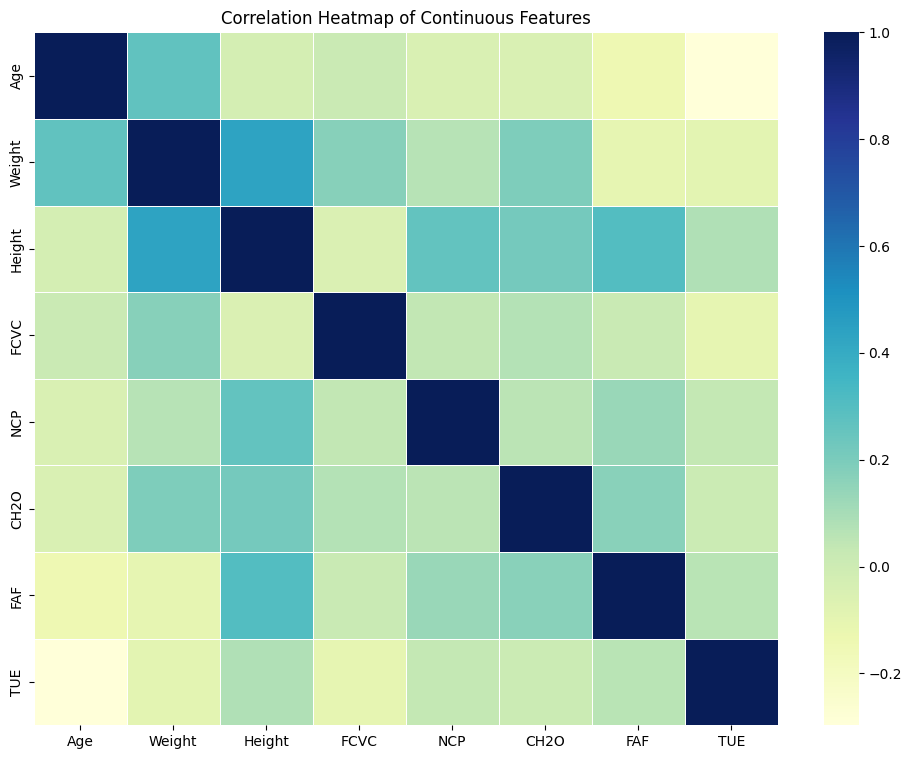

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out only the continuous (numeric) features
continuous_data = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
continuous_df = copied_data[continuous_data]

# Calculate the correlation matrix
correlation_matrix = continuous_df.corr()

# Plot the heatmap for continuous features only
plt.figure(figsize=(12, 9))
sns.heatmap(continuous_df.corr(), cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Features")
plt.show()


**DRAWING A CONFUSION MATRIX AND TESTING ACCURACY OF LOGISTIC REGRESSION MODEL ON DATASET**

I created both my X and Y dataset after which I decided to split it between training data and test data.
I trained the data on the Logistic Regression model which is a supervised model and basically predicts the outcome of an event by outputting a binary value of either 1 or 0. I develops the relationship between various variables in the dataset in order to make predictions.

I got the various values for the one hot encoded 'NObeyesdad' category by using numpy.argmax to get the maximum value in every row. This method made it easier to properly classify under various categories of NObeyesdad.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


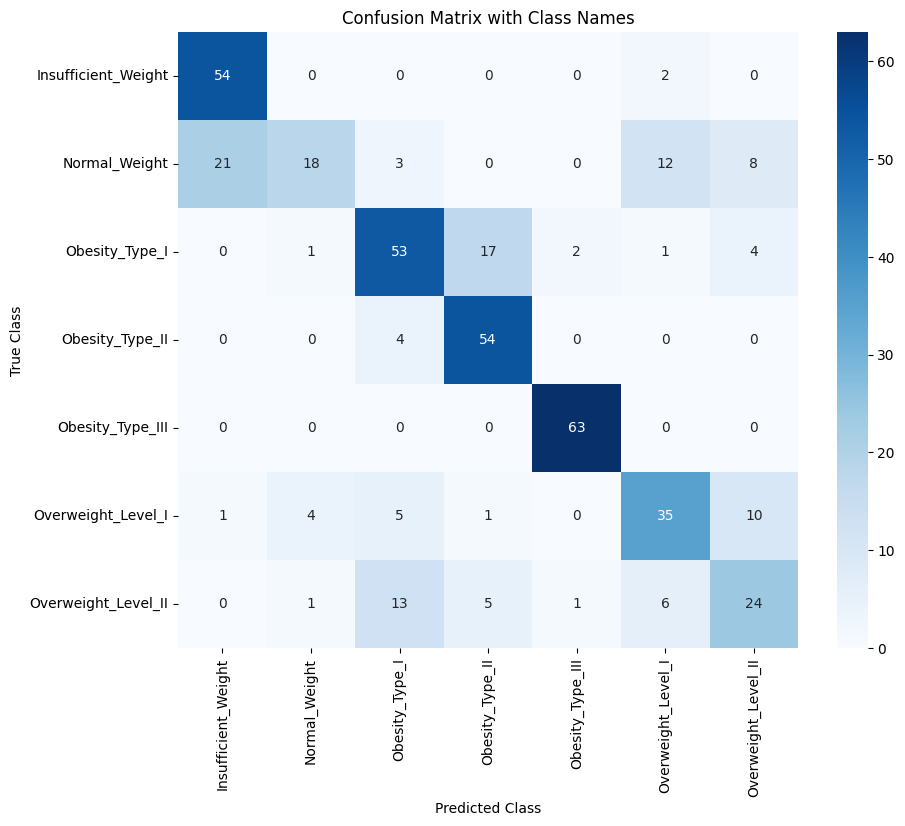

Accuracy: 71.16%
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        56
           1       0.75      0.29      0.42        62
           2       0.68      0.68      0.68        78
           3       0.70      0.93      0.80        58
           4       0.95      1.00      0.98        63
           5       0.62      0.62      0.62        56
           6       0.52      0.48      0.50        50

    accuracy                           0.71       423
   macro avg       0.71      0.71      0.69       423
weighted avg       0.71      0.71      0.69       423



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X = copied_data.drop(['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
                      'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
                      'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
                      'NObeyesdad_Overweight_Level_II'], axis=1)

y = copied_data[['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
                 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
                 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
                 'NObeyesdad_Overweight_Level_II']]
y = np.argmax(y.values, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=3000, multi_class='ovr')  # OVR handles multi-class
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Assuming y_test and y_pred are 1D arrays of class labels
# Define your class names (make sure they match the number of classes)
class_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
               'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

# Add titles and labels
plt.title('Confusion Matrix with Class Names')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(metrics.classification_report(y_test, y_pred))

Accuracy: 94.33%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.85      0.92      0.88        62
           2       0.99      0.91      0.95        78
           3       0.95      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.88      0.88        56
           6       0.92      0.96      0.94        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



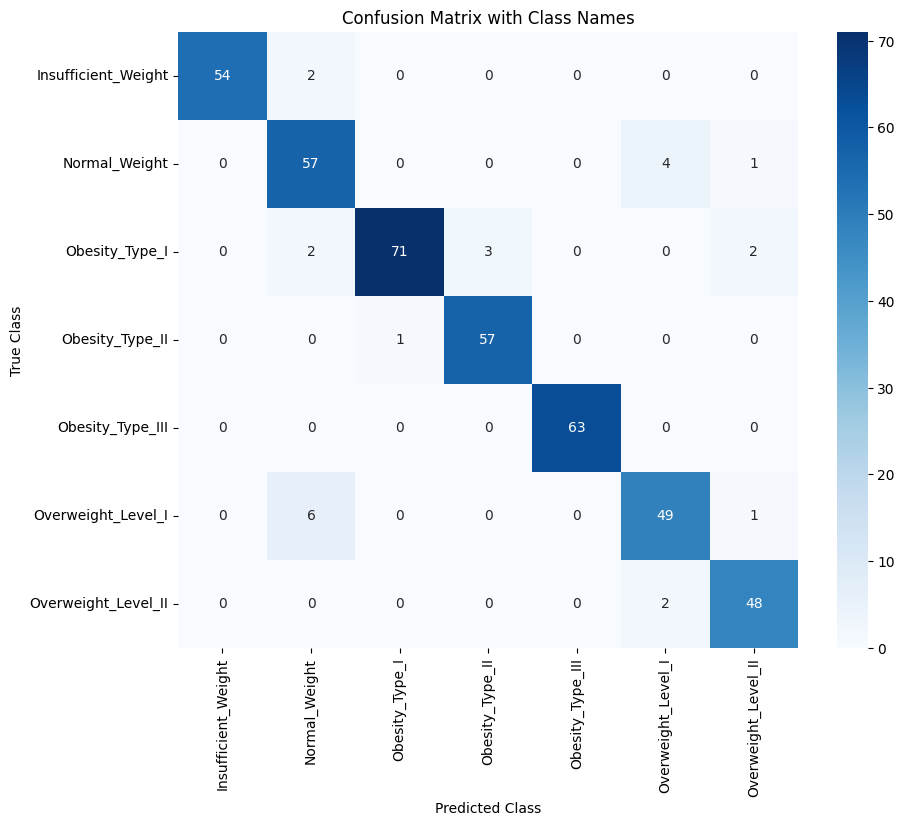

In [17]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=450, max_depth=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#model evaluation
print(metrics.classification_report(y_test, y_pred))
#confusion matrix in Random Forest
class_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
               'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

# Add titles and labels
plt.title('Confusion Matrix with Class Names')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()



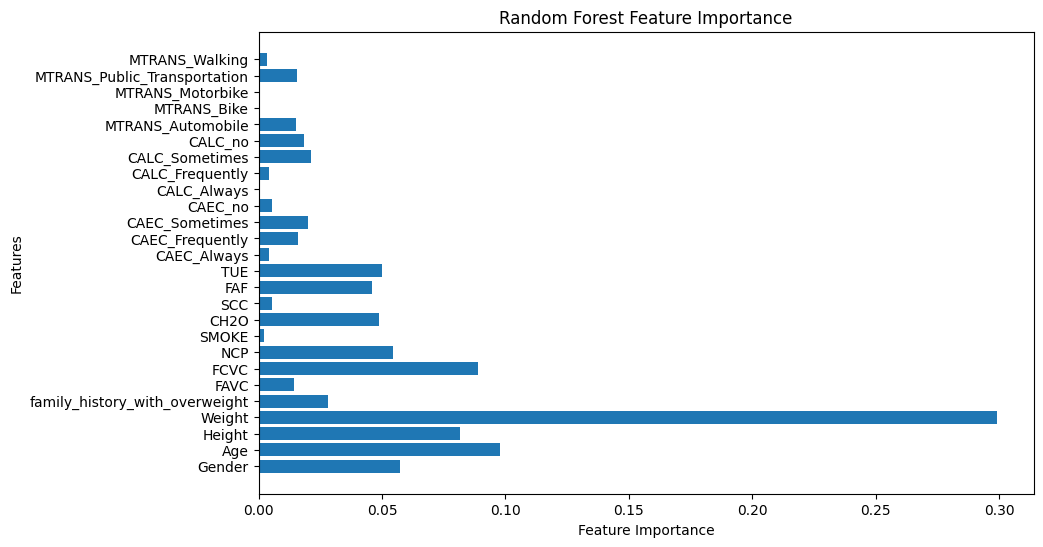

In [18]:
#show feature_importance
feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

In [19]:
#paramter tuning on KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#model evaluation
print(metrics.classification_report(y_test, y_pred))

Accuracy: 82.27%
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        56
           1       0.79      0.53      0.63        62
           2       0.87      0.86      0.86        78
           3       0.84      0.91      0.88        58
           4       0.98      1.00      0.99        63
           5       0.72      0.77      0.74        56
           6       0.73      0.76      0.75        50

    accuracy                           0.82       423
   macro avg       0.82      0.82      0.81       423
weighted avg       0.82      0.82      0.82       423



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

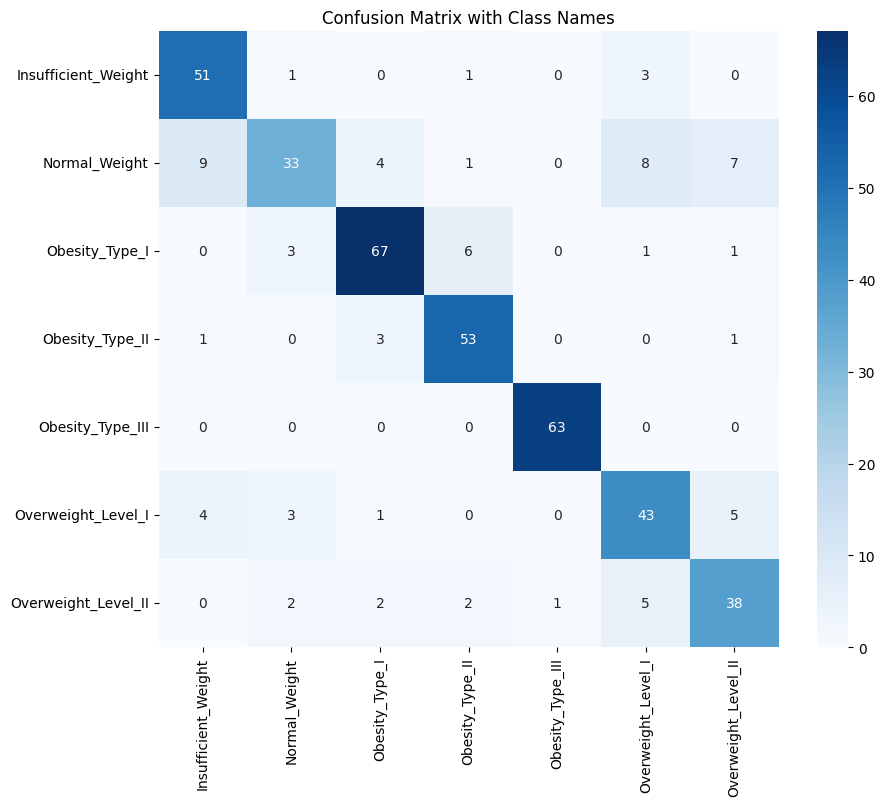

In [20]:
#confusion matrix for KNN classifier
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix with Class Names')
plt